In [1]:
#importing all the module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sensor = pd.read_csv('sensor3.csv')

In [3]:
sensor.drop(['Unnamed: 0','dt'],axis=1, inplace=True)

In [4]:
len(sensor)

125

In [5]:
sensor.head()

,sensor,con,spl,date,time
0,sensor_3,1686.44125,76.235738,2016-06-21,00:00:00
1,sensor_3,2041.33000,79.445869,2016-06-21,04:00:00
2,sensor_3,2369.71750,80.738609,2016-06-21,08:00:00
3,sensor_3,1985.25625,81.861684,2016-06-21,12:00:00
4,sensor_3,2255.37750,79.675113,2016-06-21,16:00:00


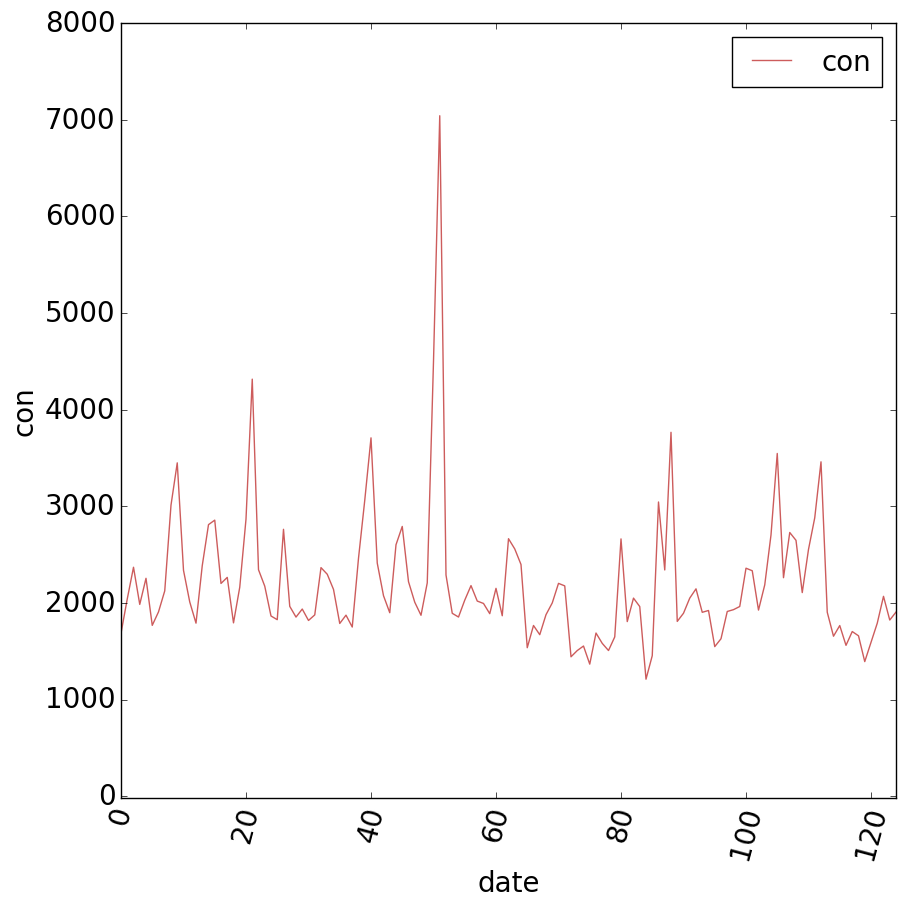

In [6]:
sensor.con.plot(figsize=(10,10), color="IndianRed")
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-20, plt.ylim()[1])
plt.legend(fontsize=20)
plt.xlabel("date", fontsize=20)
plt.ylabel("con", fontsize=20)

In [7]:
print ("mean con by day {:.2f}".format(sensor['con'].mean()))
print ("stdev con by day {:.2f}".format(sensor['con'].std()))
thresholds = [sensor['con'].mean() + 3 * sensor['con'].std(), 
              sensor['con'].mean() - 3 * sensor['con'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print "earliest datapoint:", min(sensor.date), min(sensor.time)

mean con by day 2198.28
stdev con by day 713.86
3-sigma thresholds 4339.85 56.71
earliest datapoint: 2016-06-21 00:00:00


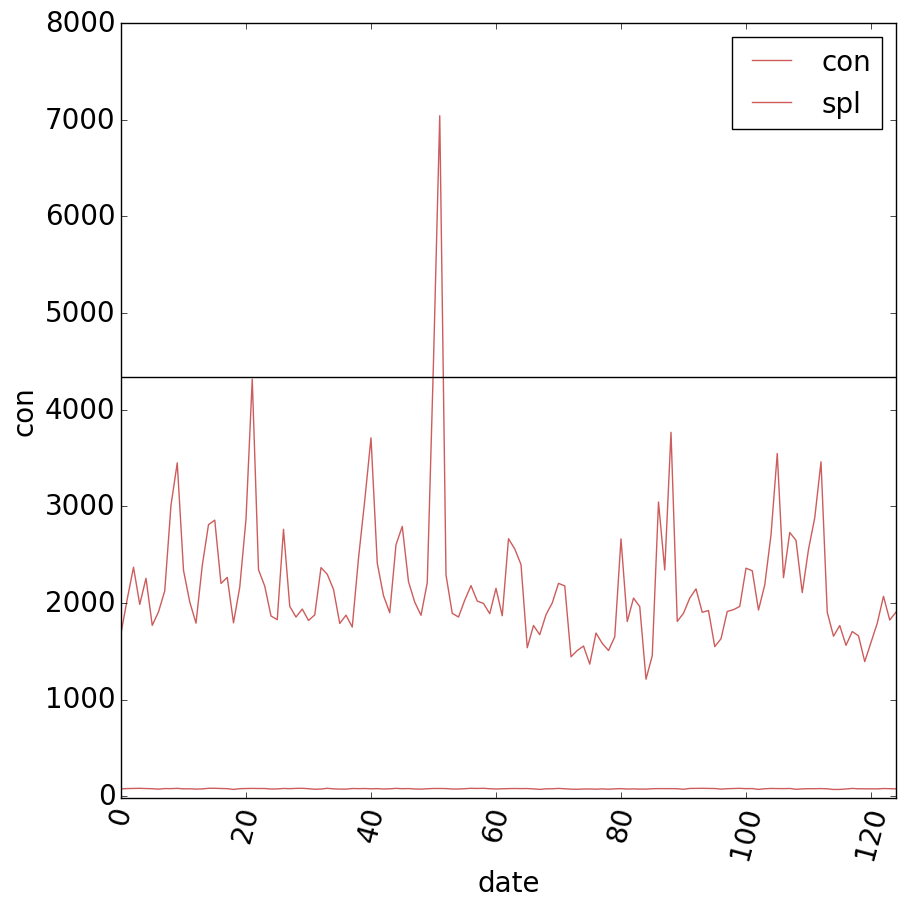

In [8]:
ax = sensor.plot(figsize=(10,10), color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k')
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-20, plt.ylim()[1])
plt.legend(fontsize=20)
plt.xlabel("date", fontsize=20)
plt.ylabel("con", fontsize=20)

In [9]:
sensor.loc[(sensor.con > thresholds[0])]

,sensor,con,spl,date,time
50,sensor_3,4500.10250,80.275216,2016-06-29,08:00:00
51,sensor_3,7042.19375,80.170259,2016-06-29,12:00:00


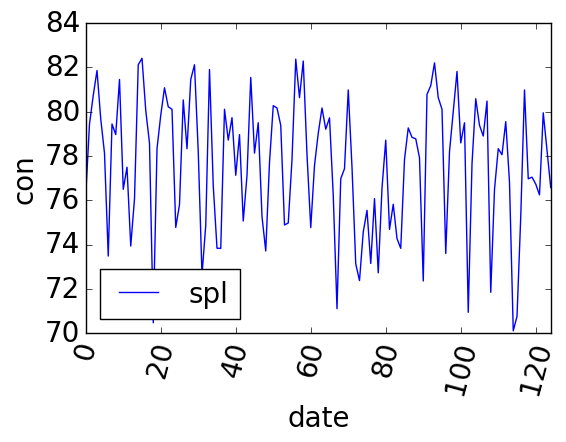

In [10]:
sensor.spl.plot()
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
#plt.ylim(0, plt.ylim()[1])
plt.legend(loc = 0,fontsize=20)
plt.xlabel("date", fontsize=20)
plt.ylabel("con", fontsize=20)

In [11]:
print ("mean con by day {:.2f}".format(sensor['spl'].mean()))
print ("stdev con by day {:.2f}".format(sensor['spl'].std()))
thresholds = [sensor['spl'].mean() + 3 * sensor['spl'].std(), 
              sensor['spl'].mean() - 3 * sensor['spl'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print "earliest datapoint:", min(sensor.date),min(sensor.time)

mean con by day 77.66
stdev con by day 2.99
3-sigma thresholds 86.61 68.70
earliest datapoint: 2016-06-21 00:00:00


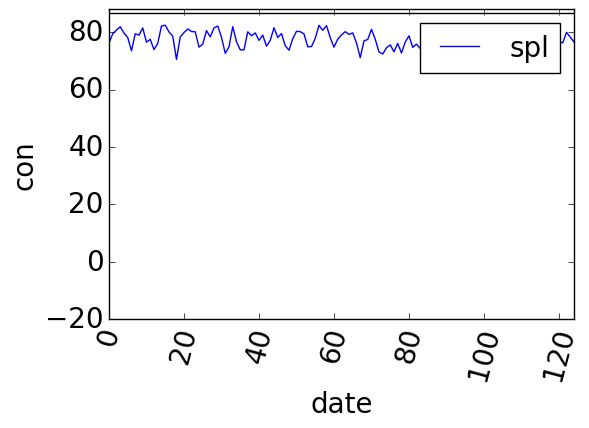

In [12]:
ax = sensor.spl.plot()
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k')
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-20, plt.ylim()[1])
plt.legend(fontsize=20)
plt.xlabel("date", fontsize=20)
plt.ylabel("con", fontsize=20)

In [13]:
sensor.loc[(sensor.spl > thresholds[0])]

,sensor,con,spl,date,time


In [14]:
sensor_con_date = sensor[['date', 'con']].groupby('date').sum()
sensor_spl_date = sensor[['date', 'spl']].groupby('date').sum()

In [15]:
print ("mean con by day {:.2f}".format(sensor_con_date['con'].mean()))
print ("stdev con by day {:.2f}".format(sensor_con_date['con'].std()))
thresholds = [sensor_con_date['con'].mean() + 3 * sensor_con_date['con'].std(), 
              sensor_con_date['con'].mean() - 3 * sensor_con_date['con'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print "earliest datapoint:", min(sensor.date),min(sensor.time)

mean con by day 13085.00
stdev con by day 2511.17
3-sigma thresholds 20618.51 5551.49
earliest datapoint: 2016-06-21 00:00:00


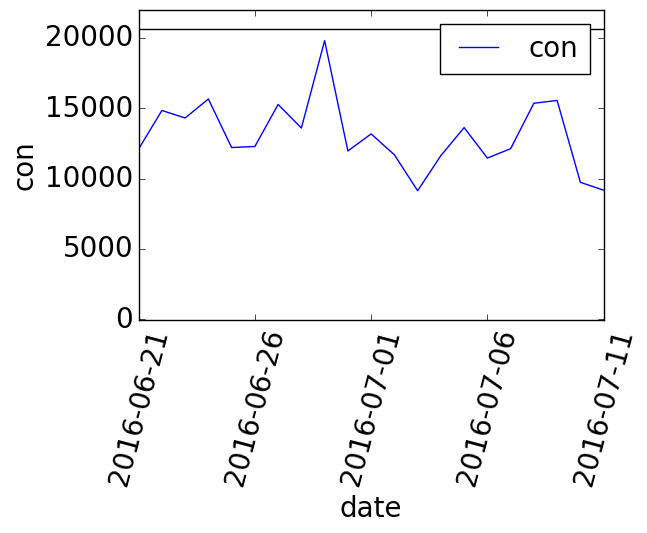

In [16]:
ax = sensor_con_date.con.plot()
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k')
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-20, plt.ylim()[1])
plt.legend(fontsize=20)
plt.xlabel("date", fontsize=20)
plt.ylabel("con", fontsize=20)

In [17]:
sensor_con_date.loc[(sensor_con_date.con > thresholds[0])]

,con
date,


In [18]:
print ("mean con by day {:.2f}".format(sensor_spl_date['spl'].mean()))
print ("stdev con by day {:.2f}".format(sensor_spl_date['spl'].std()))
thresholds = [sensor_spl_date['spl'].mean() + 3 * sensor_spl_date['spl'].std(), 
              sensor_spl_date['spl'].mean() - 3 * sensor_spl_date['spl'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print "earliest datapoint:", min(sensor.date),min(sensor.time)

mean con by day 462.24
stdev con by day 19.11
3-sigma thresholds 519.56 404.92
earliest datapoint: 2016-06-21 00:00:00


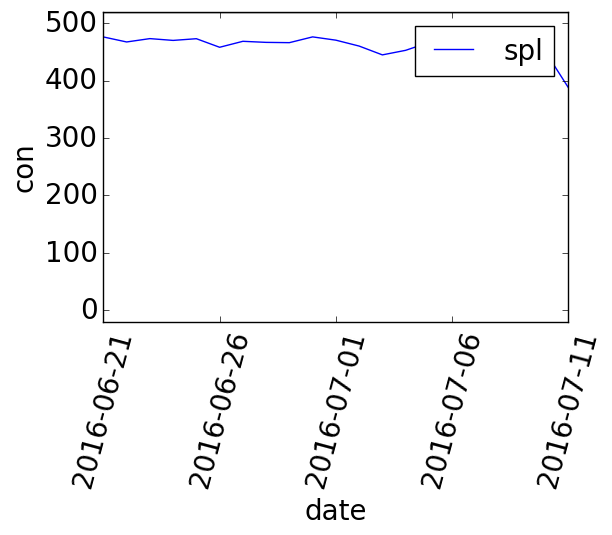

In [19]:
ax = sensor_spl_date.spl.plot()
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k')
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-20, plt.ylim()[1])
plt.legend(fontsize=20)
plt.xlabel("date", fontsize=20)
plt.ylabel("con", fontsize=20)

In [20]:
sensor_spl_date.loc[(sensor_spl_date.spl > thresholds[0])]

,spl
date,
